# Library

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image as tf_image
from PIL import Image
from tensorflow.keras.models import load_model

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import gdown

In [8]:
!pip install -U -q PyDrive
!pip install gdown

In [9]:
# Autentikasi dan buat koneksi ke Google Drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# link model = https://drive.google.com/file/d/1-3AZ5KrlnekkCjpE_lQWdYrvN_IGOtvQ/view?usp=sharing

# Model Inference

In [10]:
# Ganti your_file_id dengan ID file Anda
file_id = '1-3AZ5KrlnekkCjpE_lQWdYrvN_IGOtvQ'

# Muat model dari Google Drive
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('cnn_model.keras')

# Load model menggunakan TensorFlow
model = tf.keras.models.load_model('cnn_model.keras')

In [ ]:
# Class Sakit = 0
# drive image = https://drive.google.com/file/d/1QZvh66i-gdlcpmvqM66KjmOm0lOU0_8i/view?usp=drive_link

# Class Sehat = 1
# drive image = https://drive.google.com/file/d/1Ms1m7-xcQIkmqNUArOvYYl-luI9OGZbi/view?usp=drive_link
# drive image = https://drive.google.com/file/d/1mIv1Se00h_RKojtM0Imgk5-tTNZLJFps/view?usp=drive_link

Downloading...
From: https://drive.google.com/uc?id=1QZvh66i-gdlcpmvqM66KjmOm0lOU0_8i
To: /content/downloaded_image.jpg
100%|██████████| 35.6k/35.6k [00:00<00:00, 26.0MB/s]


1/1 [==============================] - 0s 226ms/step


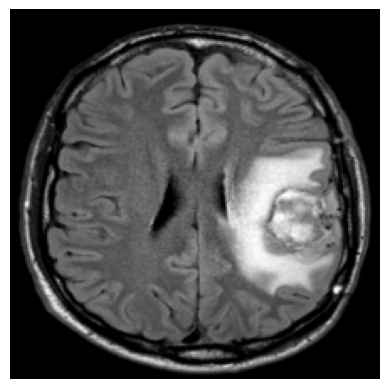

[[0.]]


In [11]:
# Google Drive file ID
file_id = '1QZvh66i-gdlcpmvqM66KjmOm0lOU0_8i'
# konstruksi download URL
download_url = f'https://drive.google.com/uc?id={file_id}'
# Local filename untuk download gambar
output = 'downloaded_image.jpg'

# Download gambar
gdown.download(download_url, output, quiet=False)

# Load gambar
image = Image.open(output)
# Convert gambar kedalam grayscale
image = image.convert('L')
# Convert grayscale image to RGB
image = image.convert('RGB')
# Resize the image to match the input shape of model
image = image.resize((220, 220))
# Convert the image to an array
image_array = tf_image.img_to_array(image)

# Expand dimensions to match model input shape
image_array = tf.expand_dims(image_array, axis=0)

# Make predictions
predictions = model.predict(image_array)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

# Display the predictions
print(predictions)

# Kesimpulan

Berdasarkan permodelan yang telah dibuat menggunakan CNN telah didapatkan model yang dapat memprediksi hasil CT Scan Kepala pasien apakah hasil tersebut mengandung indikasi sehat maupun terdapat tumor. Nilai accuracy dari model yang telah dibuat mencapat 0.93 atau 93%. Harapan dari model ini dapat membantu bagian terkait dalam mendapatkan persepsi sementara berkaitan dengan hasil CT Scan, sehingga dapat membantu bagian ahli untuk mendiagnosis selanjutnya.


Kelemahan model :
1. Model ini memiliki nilai accuracy sebesar 93% yang masih bisa ditingkatkan.
2. Tidak terdapat analisis kemampuan model dalam memprediksi tingkat stadium penyakit tumor didalam otak.